In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification, make_regression

In [42]:
def make_random_data(n_rows, n_columns, problem_type):
    if problem_type == "classification":
        x, y = make_classification(n_samples=n_rows, n_features=n_columns, n_classes=2, random_state=21)
    elif problem_type == "regression":
        x, y = make_regression(n_samples=n_rows, n_features=n_columns)
    
    feature_names = [f"x_{i}" for i in range(x.shape[1])]
    feature_names.append("target")
    
    return pd.DataFrame(np.concatenate((x, y.reshape(-1,1)), axis=1), columns=feature_names)

data_classification = make_random_data(n_rows=100, n_columns=10, problem_type="classification")
data_regression = make_random_data(n_rows=100, n_columns=10, problem_type="regression")
data_regression

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,target
0,-1.406443,0.095395,0.702296,1.637062,0.613154,0.055370,-0.240875,0.120853,0.190918,1.507169,116.103673
1,0.057764,-0.055698,0.096949,-0.398106,-0.393953,0.106571,1.763514,-0.371550,-0.984233,-0.315364,-79.898140
2,-0.095807,0.425077,1.347864,-1.767760,0.516914,0.692119,-0.867617,-0.961747,1.899550,-0.790154,10.834235
3,-1.075314,-0.369439,-0.294164,-0.551424,-0.167901,-1.608192,0.457403,1.054794,-0.692943,0.614384,-192.035952
4,-0.807445,1.564458,0.962063,0.066150,1.092314,-0.589738,0.578448,1.100733,0.265488,-0.921710,79.689091
...,...,...,...,...,...,...,...,...,...,...,...
95,0.116028,0.914617,-0.535280,0.004435,-1.739501,-1.267179,-2.727517,0.324345,0.172801,-0.627018,-169.377685
96,-0.953975,-1.753854,-1.021328,0.659155,-2.555383,-0.748612,0.270809,0.150141,-0.221071,-0.079708,-210.255794
97,-0.583881,-0.006963,1.128371,1.431660,-0.699556,-1.341429,0.791885,-0.103101,1.025854,-0.537191,52.593579
98,-0.085207,1.830395,0.811040,-0.636988,0.432056,1.070411,-1.274225,-0.114573,-0.575302,0.138895,35.421726


In [43]:
data_classification.var()

x_0       1.317052
x_1       1.433999
x_2       0.813250
x_3       1.137152
x_4       0.870081
x_5       0.774427
x_6       0.870288
x_7       1.048479
x_8       1.397943
x_9       2.372108
target    0.252525
dtype: float64

In [44]:
# Remove features that have low variance ie. they are almost constant
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=1.0)
transformed_data = var_thres.fit_transform(data_classification.drop(columns=["target"]))
pd.DataFrame(transformed_data)

,0,1,2,3,4,5
0,-0.304180,0.499770,-0.930986,-0.498250,0.740040,1.103170
1,0.159726,1.360251,-1.573324,0.236686,0.171186,1.893630
2,1.984758,0.987433,1.422739,-1.800050,-1.055891,0.664531
3,0.189401,0.264090,1.347407,-0.631017,0.227037,0.484254
4,0.074976,-1.781137,-2.286583,-0.518173,1.230037,-1.604579
...,...,...,...,...,...,...
95,-0.449590,0.373126,-0.669493,0.428601,-1.237158,-0.253206
96,0.832561,-0.855009,-0.076494,1.012445,-0.537829,-1.449137
97,-1.027553,1.100880,0.842681,0.260149,-0.829631,0.950012
98,0.471626,-1.777680,0.650902,-0.694024,0.163840,-2.241550


In [45]:
# Remove features that have high correlation.
data_classification.drop(columns=["target"]).corr()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9
x_0,1.000000,0.157444,0.111285,-0.087054,0.087253,-0.017382,0.011572,0.052566,-0.036804,0.144146
x_1,0.157444,1.000000,0.674399,0.072759,0.002379,0.234263,0.085414,0.170274,-0.275968,0.896043
x_2,0.111285,0.674399,1.000000,-0.018128,-0.120620,0.180651,0.062325,0.145982,0.523582,0.932101
x_3,-0.087054,0.072759,-0.018128,1.000000,-0.086677,-0.005972,-0.076379,0.089306,-0.107552,0.024791
x_4,0.087253,0.002379,-0.120620,-0.086677,1.000000,-0.097443,0.015572,-0.012482,-0.159761,-0.071360
x_5,-0.017382,0.234263,0.180651,-0.005972,-0.097443,1.000000,-0.007593,0.240766,-0.035146,0.223538
x_6,0.011572,0.085414,0.062325,-0.076379,0.015572,-0.007593,1.000000,-0.002967,-0.017424,0.079374
x_7,0.052566,0.170274,0.145982,0.089306,-0.012482,0.240766,-0.002967,1.000000,-0.006442,0.171303
x_8,-0.036804,-0.275968,0.523582,-0.107552,-0.159761,-0.035146,-0.017424,-0.006442,1.000000,0.179447
x_9,0.144146,0.896043,0.932101,0.024791,-0.071360,0.223538,0.079374,0.171303,0.179447,1.000000


In [46]:
# Remove features based on univariate feature selection
from sklearn.feature_selection import chi2, f_classif, f_regression
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

class UnivariateFeatureSelection:
    def __init__(self, n_features, problem_type, scoring):
        """
        Custom univariate feature selection wrapper.
        :param n_features: SelectPercentile if float else SelectKBest
        :param problem_type: classification or regression
        :param scoring: scoring function, string
        """
        if problem_type == "classification":
            valid_scoring = {
                "f_classif": f_classif,
                "chi2": chi2,
                "mutual_info_classif": mutual_info_classif
            }
        
        elif problem_type == "regression":
            valid_scoring = {
                "f_regression": f_classif,
                "mutual_info_regression": mutual_info_classif
            }
        
        if scoring not in valid_scoring:
            raise Exception(f"Invalid scoring function. Valid scorings are: {valid_scoring.keys()}")
            
        if isinstance(n_features, int):
            self.selection = SelectKBest(valid_scoring[scoring], k=n_features)
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(valid_scoring[scoring], percentile=int(n_features*100))
        else:
            raise Exception(f"n_features should be either float or int.")
            
    def fit(self, X, y):
        return self.selection.fit(X, y)
    
    def transform(self, X):
        return self.selection.transform(X)
    
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X,y)
    
ufs = UnivariateFeatureSelection(n_features=0.5, problem_type="regression", scoring="f_regression")
ufs.fit(X=data_regression.drop(columns=["target"]), y=data_regression["target"])
data_regression_transformed = ufs.transform(data_regression.drop(columns=["target"]))
pd.DataFrame(data_regression_transformed)

/home/gurkandurmus/anaconda3/envs/custom_base/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


,0,1,2,3,4
0,-1.406443,0.095395,0.702296,1.637062,0.613154
1,0.057764,-0.055698,0.096949,-0.398106,-0.393953
2,-0.095807,0.425077,1.347864,-1.767760,0.516914
3,-1.075314,-0.369439,-0.294164,-0.551424,-0.167901
4,-0.807445,1.564458,0.962063,0.066150,1.092314
...,...,...,...,...,...
95,0.116028,0.914617,-0.535280,0.004435,-1.739501
96,-0.953975,-1.753854,-1.021328,0.659155,-2.555383
97,-0.583881,-0.006963,1.128371,1.431660,-0.699556
98,-0.085207,1.830395,0.811040,-0.636988,0.432056


In [47]:
%%time
# Remove features based on greedy feature selection
from sklearn import metrics, linear_model

class GreedyFeatureSelection:
    
    def evaluate_score(self, X, y):
        """
        :param X: training data
        :param y: targets
        :return: overfitted area under the roc curve
        """
        model = linear_model.LogisticRegression()
        model.fit(X,y)
        preds = model.predict_proba(X)[:, 1]
        auc = metrics.roc_auc_score(y, preds)
        
        return auc
    
    def _feature_selection(self, X, y):
        """
        :param X: data, numpy array
        :param y: targets, numpy array
        :return: (best_scores, best_features)
        """
        good_features = []
        best_scores = []
        
        num_features = X.shape[1]
        state = True
        while state:
            best_score = 0
            for feature in range(num_features):
                if feature in good_features:
                    continue
                    
                selected_features = good_features + [feature]
                score = self.evaluate_score(X[:, selected_features], y)
                if score > best_score:
                    best_score = score
                    best_scores.append(best_score)
                    good_features.append(feature)
                
            if len(best_scores) > 2:
                if best_scores[-1] <= best_scores[-2]:
                    state = False

        return best_scores[:-1], good_features[:-1]
        
    def __call__(self, X, y):
        scores, features = self._feature_selection(X, y)
        
        return X[:, features], scores

X = data_classification.drop(columns=["target"]).values
y = data_classification["target"].values

X_transformed, scores = GreedyFeatureSelection()(X, y)

CPU times: user 77.1 ms, sys: 7.88 ms, total: 85 ms
Wall time: 85 ms


In [48]:
X_transformed.shape

(100, 6)

In [49]:
scores

[0.5176, 0.9332, 0.984, 0.9868000000000001, 0.9884, 0.9896]

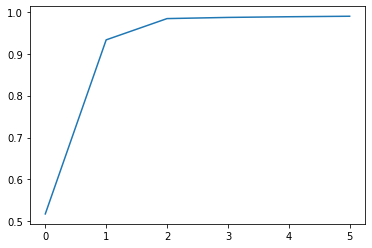

In [50]:
import matplotlib.pyplot as plt
plt.plot(range(len(scores)), scores)

In [51]:
# Remove features based on recursive feature elimination
from sklearn. feature_selection import RFE

model = linear_model.LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)

X = data_regression.drop(columns=["target"])
y = data_regression["target"]
rfe.fit(X, y)

X_transformed = rfe.transform(X)
pd.DataFrame(X_transformed)

,0,1,2
0,-1.406443,0.055370,0.120853
1,0.057764,0.106571,-0.371550
2,-0.095807,0.692119,-0.961747
3,-1.075314,-1.608192,1.054794
4,-0.807445,-0.589738,1.100733
...,...,...,...
95,0.116028,-1.267179,0.324345
96,-0.953975,-0.748612,0.150141
97,-0.583881,-1.341429,-0.103101
98,-0.085207,1.070411,-0.114573


In [52]:
data_regression

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,target
0,-1.406443,0.095395,0.702296,1.637062,0.613154,0.055370,-0.240875,0.120853,0.190918,1.507169,116.103673
1,0.057764,-0.055698,0.096949,-0.398106,-0.393953,0.106571,1.763514,-0.371550,-0.984233,-0.315364,-79.898140
2,-0.095807,0.425077,1.347864,-1.767760,0.516914,0.692119,-0.867617,-0.961747,1.899550,-0.790154,10.834235
3,-1.075314,-0.369439,-0.294164,-0.551424,-0.167901,-1.608192,0.457403,1.054794,-0.692943,0.614384,-192.035952
4,-0.807445,1.564458,0.962063,0.066150,1.092314,-0.589738,0.578448,1.100733,0.265488,-0.921710,79.689091
...,...,...,...,...,...,...,...,...,...,...,...
95,0.116028,0.914617,-0.535280,0.004435,-1.739501,-1.267179,-2.727517,0.324345,0.172801,-0.627018,-169.377685
96,-0.953975,-1.753854,-1.021328,0.659155,-2.555383,-0.748612,0.270809,0.150141,-0.221071,-0.079708,-210.255794
97,-0.583881,-0.006963,1.128371,1.431660,-0.699556,-1.341429,0.791885,-0.103101,1.025854,-0.537191,52.593579
98,-0.085207,1.830395,0.811040,-0.636988,0.432056,1.070411,-1.274225,-0.114573,-0.575302,0.138895,35.421726


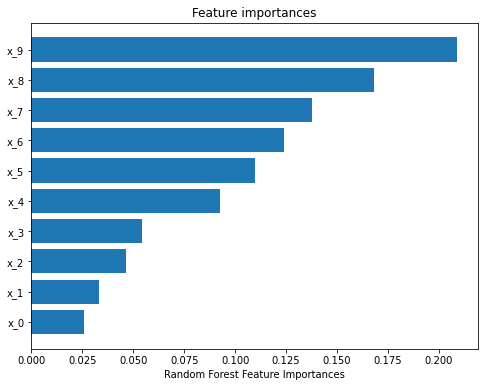

In [67]:
# Remove features based on the feature importance
from sklearn import ensemble

model = ensemble.RandomForestRegressor()
model.fit(X,y)
importances = model.feature_importances_
idx = np.argsort(importances)
plt.figure(figsize=(8,6))
plt.title("Feature importances")
plt.barh(range(len(idx)), importances[idx], align="center")
plt.yticks(range(len(idx)), [data_regression.columns[col] for col in range(len(idx))])
plt.xlabel("Random Forest Feature Importances")
plt.show()

In [73]:
# Select features using SelectFromModel class
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(estimator=model, max_features=3)
X_transformed = sfm.fit_transform(X,y)
support = sfm.get_support()
data_regression.drop(columns=["target"]).loc[:, support]

,x_5,x_8,x_9
0,0.055370,0.190918,1.507169
1,0.106571,-0.984233,-0.315364
2,0.692119,1.899550,-0.790154
3,-1.608192,-0.692943,0.614384
4,-0.589738,0.265488,-0.921710
...,...,...,...
95,-1.267179,0.172801,-0.627018
96,-0.748612,-0.221071,-0.079708
97,-1.341429,1.025854,-0.537191
98,1.070411,-0.575302,0.138895
